<table>
  <tr>
    <td style="text-align: left;">
      <h1>Lighthouse Labs</h1>
      <h2>W4D4 - APIs and Other Data Types</h2>
      <strong>Instructor:</strong> Socorro E. Dominguez-Vidana
    </td>
    <td style="text-align: right;">
      <img src="img/lhl.jpeg" alt="LHL" width="200">
    </td>
  </tr>
</table>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/sedv8808/LHL_Lectures/main?labpath=W4D4%2FW4D4_APIs_and_Other_Data_Types.ipynb)

Overview:
- [] Introduction to APIs
    - [] Using APIs as a data professional
    - [] Real-Life Examples
    - [] HTTP Requests
    - [] Sending requests from different environments
    - [] Best practices for working with APIs
- [] Other Data Types
- [] Why is JSON so popular?
- [] JSON vs XML?
- [] Combining Python and Excel

### Where Does Our Data Come From?

- **Everyday Data**: We interact with data constantly—whether we’re looking at our bank account, browsing social media, or searching for a restaurant to eat at.
- **Sources of Data**: Data can come from many different places, and as a data scientist, understanding these sources is key to solving real-world problems.
- **Why It Matters**: How we collect data influences what questions we can ask and what insights we can generate.

<table>
  <tr>
    <td style="text-align: left;">
      <h1>Meet Jason</h1>
      <strong>Name: </strong> Jason <br><br>
      <strong>Hobby: </strong> Hiking, seismology, coding. <br><br>
      <strong>Goal: </strong> Use data to predict earthquakes. <br><br>
    </td>
    <td style="text-align: right;">
      <img src="img/geologist.png" alt="geologist" width="75"><br>
      <a href="https://creazilla.com/media/clipart/1795355/safari-guide" target="_blank">Creazilla. (n.d.). Safari guide [Clip art]. Creazilla.</a>
    </td>
  </tr>
</table>

##### How can Jason gather the data?

- **Public Datasets**: Governments and research institutions often provide open data on seismic activity.
- **Seismic Networks**: Organizations like the Global Seismographic Network (GSN) and local observatories gather seismic data from around the world.
- **Historical Records**: Libraries, academic institutions, and online archives host datasets on past earthquakes.
- **Crowdsourced Data**: Platforms like "Did You Feel It?" allow the public to report real-time observations of seismic activity.
- **Private Companies**: Some tech and insurance companies also collect data for risk analysis and disaster response.

##### Challenges:
- **Data Fragmentation**: Data may have inconsistent formats and varying levels of detail.
- **Manual Download**: Requires manual effort and is time-consuming.
- If Jason wanted to mine data from the web (maybe private companies information):
    - Almost all information is irrelevant
    - Websites often require interaction (“Load More”, scrolling down)
    - When websites update, the code will break
    - Every website is different
    - Companies actively try to stop data miners; data mining might be illegal.

#### APIs in Data Science

- **A**pplication **P**rogramming **I**nterfaces allow data scientists to **connect** with databases, **retrieve** data, and **automate** analysis.

- APIs allow applications to communicate with each other serving as bridges between different data sources.
- Many fields provide open data APIs for accessing information, including weather, finance, and geological data.
- APIs simplify data collection without manually downloading files.

#### Why use APIs?

- **Real-Time Data Access**: APIs like the **[USGS Earthquake API](https://earthquake.usgs.gov/fdsnws/event/1/)** provide up-to-the-minute seismic data, giving Jason instant access to recent earthquake activity.
- **Consistency in Data Format**: APIs often return data in standardized formats (e.g., `JSON`, `CSV`, `XML`), making analysis much simpler.
- **Data Customization**: APIs allow Jason to filter the data by criteria like *location*, *time range*, or *earthquake magnitude*, ensuring he gets only the data relevant to his analysis.
- **Automation Capabilities**: Instead of manually checking data repositories, Jason can automate the process to continuously gather new data with scripts.

**Representational State Transfer (REST)**

- **Stateless**: Each API call is independent, with all necessary information included in the request.
- **Resource-Based**: Interactions revolve around resources, identified by URIs.
- **Use of HTTP (Hypertext Transfer Protocol) Methods**:
    - **GET:** retrieve (the only one you will have access to right now.)
    - **POST:** create
    - **PUT:** update
    - **DELETE:** remove

#### Accessing Seismic Data via the USGS Earthquake API

Jason's new **BFF**: [Documentation](https://earthquake.usgs.gov/fdsnws/event/1/)

In [1]:
import requests

In [2]:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

In [3]:
params = {
    'format': 'geojson',
    'starttime': '1023-01-01',
    'endtime': '2024-10-02',
    'latitude': 36.77,
    'longitude': -119.41,
    'maxradius': 50, 
    'minmagnitude': 5,
    'limit': 2000
}

In [4]:
response = requests.get(url, params=params)
response

<Response [200]>

In [5]:
data = response.json()

In [6]:
response.url

'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1023-01-01&endtime=2024-10-02&latitude=36.77&longitude=-119.41&maxradius=50&minmagnitude=5&limit=2000'

In [7]:
#data

Jason can extracts relevant data such as magnitude and location for analysis using other python libraries such as **matplotlib** and **pandas**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
features = data['features']
df = pd.json_normalize(features)
df.head(3)

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,us7000ngxr,5.1,"207 km WSW of Pistol River, Oregon",1727492655149,1727838864614,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,11.0,...,",dyfi,internal-moment-tensor,moment-tensor,oaf...",69.0,1.910,1.35,213.0,mww,earthquake,"M 5.1 - 207 km WSW of Pistol River, Oregon",Point,"[-126.8404, 41.8543, 10]"
1,Feature,us7000ngr0,5.1,"84 km SW of Corinto, Nicaragua",1727408371854,1727444129040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",internal-moment-tensor,moment-tensor,origin,p...",70.0,1.021,0.93,135.0,mww,earthquake,"M 5.1 - 84 km SW of Corinto, Nicaragua",Point,"[-87.6523, 11.8785, 51.404]"
2,Feature,us7000ngme,5.0,"4 km NW of San Miguel Totolapan, Mexico",1727377382951,1727447850638,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,12.0,...,",dyfi,origin,phase-data,",134.0,1.636,0.97,158.0,mb,earthquake,"M 5.0 - 4 km NW of San Miguel Totolapan, Mexico",Point,"[-100.4196, 18.1862, 70.492]"


In [10]:
df['magnitude'] = df['properties.mag']
df['place'] = df['properties.place']
df['time'] = pd.to_datetime(df['properties.time'], unit='ms')

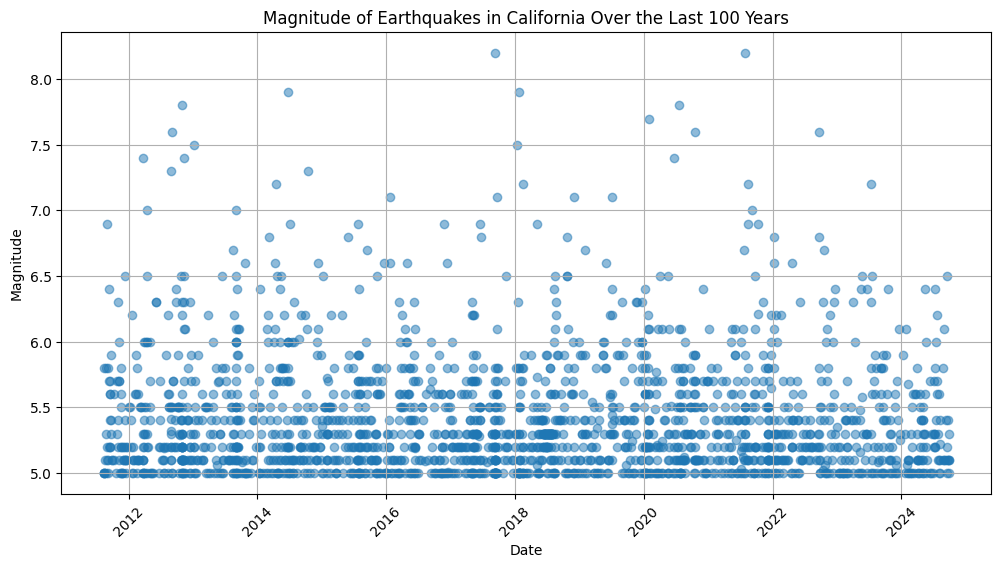

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['magnitude'], alpha=0.5)
plt.title('Magnitude of Earthquakes in California Over the Last 12 Years')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Where is the USGS data really stored?

- The USGS API provides access to a (possibly) *SQL* database of earthquake events collected and maintained by the USGS.
- The data originates from various seismic networks and is updated in near real-time.
- The database is not publicly accessible in the sense that you cannot download it and query it to your liking.
- Each call that you do to the API possibly triggers a SQL function that yields the information back to you.

#### The API as a Server

![api server](https://www.monosolutions.com/uploads/RY0RcBjd/pngbase6419c241d835623b8.png)
[Monosolutions. (n.d.). Image of API server](https://www.monosolutions.com/uploads/RY0RcBjd/pngbase6419c241d835623b8.png)

![api server](https://www.sqlshack.com/wp-content/uploads/2021/03/representational-state-transfer-diagram_gray-e1615546557211.png)
[ SQL Shack. (2021). Representational state transfer diagram](https://www.sqlshack.com/wp-content/uploads/2021/03/representational-state-transfer-diagram_gray-e1615546557211.png)

#### Disclaimer: Can Data Science Predict Earthquakes?

- Short answer: Not yet. And **Domain Expertise** is crucial.
- Earthquakes are caused by tectonic movements, but predicting the exact time and location remains a challenge.
- Jason wants to use data science tools like machine learning to find patterns in seismic data.
- Jason will need to **work closely** with geologists and seismologists to ensure his models are scientifically accurate.

#### From Terminal, a Browser, and Postman

```bash
!curl -G "https://earthquake.usgs.gov/fdsnws/event/1/query" \
--data-urlencode "format=geojson" \
--data-urlencode "starttime=1924-10-01" \
--data-urlencode "endtime=2024-10-01" \
--data-urlencode "latitude=36.7783" \
--data-urlencode "longitude=-119.4179" \
--data-urlencode "maxradius=50" \
--data-urlencode "minmagnitude=0.0" \
--data-urlencode "limit=1"
```

[https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1924-10-01&endtime=2024-10-01&latitude=36.7783&longitude=-119.4179&maxradius=50&minmagnitude=0.0&limit=1](https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1924-10-01&endtime=2024-10-01&latitude=36.7783&longitude=-119.4179&maxradius=50&minmagnitude=0.0&limit=1
)

#### Working with Paid APIs and Authentication Keys

- The API will requires an Authentication Key
- Register on the API provider’s website to obtain access.
- After account creation, navigate to the API settings or dashboard.
- Locate the section for generating API keys or tokens.
- Follow the instructions to create a new key.
- **Read the API Documentation**

```python
import requests

url = "https://api.fakeusgs.com/v1/seismic"

# Keep your API secure using environment variables
api_key = os.getenv("WEATHER_API_KEY")

# Parameters
params = {
    "latitude": 10,
    "longitude": 80,
    "limit": 100}

# Headers
headers = {
    "Authorization": f"Bearer {api_key}",
    "Accept": "application/json" }

response = requests.get(url, headers=headers, params=params)
```

#### Appendix I: Common HTTP Status Codes

- **200 OK**: Success.
- **204 No Content**: No content.
- **400 Bad Request**: Invalid syntax.
- **401 Unauthorized**: Authentication is required and has failed/not been provided.
- **403 Forbidden**: The server cannot authorize it.
- **404 Not Found**: The resource was not found on the server.
- **500 Internal Server Error**: The server could not fulfil the request.

## Other Data Formats

| Data Format | Example | What are we trying to use it for? |
|:-|:---------------------|:--------------------------------------------|
| Text         | Tweets, scripts, books | Sentiment analysis, other NLP |
| JSON or XML  | Parsing APIs | Gather data, data ingestion process, trend analysis, forecasting |
| HTML         |Web scraping| Get information where APIs are not available.|
| Images       |Computer vision|Self-driving cars, building custom shoes, X-rays - diagnostics|

#### Different data, different tools

* Tabular data: `pandas`, `SQL`
* XML: `xml`
* JSON: `json`
* HTML: `BeautifulSoup`

#### JSON vs XML

| Feature        | JSON      | XML           |
|-----------------------|---------------------------------------|----------------------------------------|
| **Syntax**            | Uses braces `{}` and brackets `[]`           | Nested tags  `<>`                          |
| **Verbosity**         | Less verbose                          | Complex |
| **Data Types**        | Supports arrays and objects natively  | Requires additional attributes for lists|
| **Parsing**           | Easier to parse with built-in functions| Requires a parser for XML structure   |
| **Human Readability** | Easier for humans to read and write  | More complex structure can be harder to read |
| **Use Cases**         | APIs and configuration | Document storage and data interchange |


<table border="1">
  <tr>
    <th>XML</th>
    <th>JSON</th>
  </tr>
  <tr>
    <td>
      <pre>
&lt;earthquakes&gt;
  &lt;earthquake&gt;
    &lt;magnitude&gt;4.5&lt;/magnitude&gt;
    &lt;location&gt;10 km N of Turlock, CA &lt;/location&gt;
    &lt;date&gt;2021-09-01&lt;/date&gt;
  &lt;/earthquake&gt;
&lt;/earthquakes&gt;
      </pre>
    </td>
    <td>
      <pre>
{
  "earthquakes": {
    "earthquake": {
      "magnitude": 4.5,
      "location": "10 km N of Turlock, CA",
      "date": "2021-09-01"
    }
  }
}
      </pre>
    </td>
  </tr>
  <tr>
    <th colspan="2">Tabular</th>
  </tr>
  <tr>
    <td colspan="2">
      <table border="1">
        <tr>
          <th>Magnitude</th>
          <th>Location</th>
          <th>Date</th>
        </tr>
        <tr>
          <td>4.5</td>
          <td>10 km N of Turlock, CA</td>
          <td>2021-09-01</td>
        </tr>
      </table>
    </td>
  </tr>
</table>


##### Why Save Data After Downloading from an API

- **Data Integrity**: Preserve a stable copy in case of API changes or outages.
- **Performance**: Faster local access improves application efficiency.
- **Flexibility**: Enables easier manipulation and analysis without API constraints.

### XML and BeautifulSoup
- Explore XML files with the `xml` or `BeautifulSoup` package.
- Data file provided: `toy_data.xml` and `usgs_data.xml`

In [12]:
import xml.etree.ElementTree as et

In [13]:
tree = et.parse('data/toy_data.xml')
tree

In [14]:
# Gets the tree root tag
root = tree.getroot()
root

<Element 'seismic_data' at 0x11bac0b80>

In [15]:
root.tag

'seismic_data'

From the root, we can begin to navigate the tree

In [16]:
# get root tag
print("What is the root tag:", root.tag)

# get root attributes
print("Attributes of the root tag:", root.attrib)

# get number of "children"
print("Number of children:", len(root))

What is the root tag: seismic_data
Attributes of the root tag: {}
Number of children: 3


In [17]:
for idx in range(len(root)):
    print("tag:", root[idx].tag, "| attribute:", root[idx].attrib)

tag: earthquake | attribute: {'id': '1', 'type': 'moderate'}
tag: earthquake | attribute: {'id': '2', 'type': 'light'}
tag: earthquake | attribute: {'id': '3', 'type': 'strong'}


In [18]:
x = root[0].attrib

In [19]:
x['type']

'moderate'

In [20]:
import xmltodict

In [21]:
with open('data/toy_data.xml', 'r') as file:
    xml_data = file.read()

In [22]:
xml_data

'<?xml version="1.0"?>\n<seismic_data>\n   <earthquake id="1" type="moderate">\n       <magnitude>4.5</magnitude>\n       <location>10 km N of Turlock, CA</location>\n       <date>2021-09-01</date>\n       <depth>10</depth> <!-- in kilometers -->\n       <coordinates>\n           <latitude>36.7783</latitude>\n           <longitude>-119.4179</longitude>\n       </coordinates>\n   </earthquake>\n   <earthquake id="2" type="light">\n       <magnitude>5.1</magnitude>\n       <location>20 km S of San Jose, CA</location>\n       <date>2022-06-15</date>\n       <depth>15</depth> <!-- in kilometers -->\n       <coordinates>\n           <latitude>37.3349</latitude>\n           <longitude>-121.8890</longitude>\n       </coordinates>\n   </earthquake>\n   <earthquake id="3" type="strong">\n       <magnitude>6.0</magnitude>\n       <location>30 km SW of Los Angeles, CA</location>\n       <date>2023-01-10</date>\n       <depth>20</depth> <!-- in kilometers -->\n       <coordinates>\n           <lat

In [23]:
data_dict = xmltodict.parse(xml_data)
data_dict.keys()

dict_keys(['seismic_data'])

In [24]:
# data_dict

In [25]:
from bs4 import BeautifulSoup

In [26]:
soup = BeautifulSoup(xml_data, 'lxml-xml')

In [27]:
soup.find_all('earthquake')[1]

<earthquake id="2" type="light">
<magnitude>5.1</magnitude>
<location>20 km S of San Jose, CA</location>
<date>2022-06-15</date>
<depth>15</depth> <!-- in kilometers -->
<coordinates>
<latitude>37.3349</latitude>
<longitude>-121.8890</longitude>
</coordinates>
</earthquake>

#### JSON

- Explore JSON files with the `json` and `pandas`.
- Data file provided: `toy_data.json` and `usgs_data.json`

In [28]:
import pandas as pd

file = 'data/toy_data.json'
json_data = pd.read_json(file)
json_data

,seismic_data
0,"{'region': 'California', 'earthquake_data': [{..."
1,"{'region': 'Nevada', 'earthquake_data': [{'ear..."
2,{'earthquake_data': [{'earthquakes': [{'magnit...


- `pd.read_json` doesn't always work with nested **JSON** files...
- You may encounter `ValueErrors` as it tries to create a `pd.DataFrame`

In [29]:
from IPython.display import JSON
import pprint
import json

In [30]:
with open('data/toy_data.json') as file:
    data = json.load(file)

In [31]:
#pprint.pprint(data)

In [32]:
# Just Jupyter Lab
JSON(data)

<IPython.core.display.JSON object>

In [33]:
pd.json_normalize(data)

,seismic_data
0,"[{'region': 'California', 'earthquake_data': [..."


In [34]:
data.keys()

dict_keys(['seismic_data'])

In [35]:
df = pd.json_normalize(data['seismic_data'], 
                       record_path=['earthquake_data', 'earthquakes'], 
                       meta=['region'],  # Meta data at the higher level
                       meta_prefix='_',  # Prefix for clarity
                       errors='ignore') # Explore ignore/raise
df

,magnitude,location,date,_region
0,4.5,"10 km N of Turlock, CA",2021-09-01,California
1,3.8,"15 km N of Los Angeles, CA",2021-10-01,California
2,4.2,"5 km S of Reno, NV",2021-11-01,Nevada
3,3.9,"20 km W of Las Vegas, NV",2021-12-01,Nevada
4,4.1,"30 km N of Fresno, CA",2021-11-15,NaN


##### Other approaches

In [36]:
flattened_data = []

for region_info in data['seismic_data']:
    region = region_info.get('region', 'Unknown')
    for earthquake_data in region_info.get('earthquake_data', []):
        for earthquake in earthquake_data.get('earthquakes', []):
            flattened_entry = {
                'magnitude': earthquake['magnitude'],
                'location': earthquake['location'],
                'date': earthquake['date'],
                'region': region
            }
            flattened_data.append(flattened_entry)
pd.DataFrame(flattened_data)

,magnitude,location,date,region
0,4.5,"10 km N of Turlock, CA",2021-09-01,California
1,3.8,"15 km N of Los Angeles, CA",2021-10-01,California
2,4.2,"5 km S of Reno, NV",2021-11-01,Nevada
3,3.9,"20 km W of Las Vegas, NV",2021-12-01,Nevada
4,4.1,"30 km N of Fresno, CA",2021-11-15,Unknown


#### Other forms of tabular data

In [37]:
import pandas as pd
import openpyxl

In [38]:
data_xlsx = pd.read_excel('data/toy_tabular.xlsx')
data_xlsx

,Table 1,Unnamed: 1
0,NaN,NaN
1,Owner of Data:,Geo Jason


#### Excel Files
- As a Data Analyst and Scientist, you need to know both.
- It is not a competition.
- Excel files can be very practical and widely understood/used.

<img src="img/Tab2.png" alt="Tabular Image" width="300px">

<img src="img/Tab1.png" alt="Tabular Image" width="300px">

- After exploring the file, we know that the data is on `Tab 2`

In [39]:
data_xlsx = pd.read_excel('data/toy_tabular.xlsx', 
                          sheet_name='Data', 
                          header=1, 
                          usecols='B:E',
                          engine = 'openpyxl')
data_xlsx

,magnitude,location,date,_region
0,4.5,"13 km N of Turlock, CA",1996-09-01,California
1,3.8,"12 km N of Los Angeles, CA",1996-10-01,California
2,4.2,"3 km S of Reno, NV",1996-11-01,Nevada
3,3.9,"15 km W of Las Vegas, NV",1997-12-01,Nevada
4,4.1,"3 km N of Fresno, CA",1997-11-15,California


#### Useful Links

[JSON Plug-in](https://chrome.google.com/webstore/detail/json-formatter/bcjindcccaagfpapjjmafapmmgkkhgoa?hl=en)

Gulati, A. (2021, April 20). All Pandas json_normalize you should know for flattening JSON. Towards Data Science. [https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd](https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd)